# Logan Neighborhood Unemployment Data 
## Deja McCauley
## UP221 GIS Midterm
### This assignment is exploring employment and unemployment rates in a Philly neighborhood called Logan.
#### Research Question: What community needs emerge as a priority for North Philadelphia’s Logan neighborhood when using indicators (race, unemployment, food accessibility, open space access, and housing) to compare the area to the city as a whole?
##### Data Sources: Social Explorer ACS and Open Data Philly 

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv(
    'data/Logan_Unemployment.csv',
    dtype= 
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

## Cleaning and Reviewing Data 

In [3]:
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,Geo_GEOID,Geo_NAME,Geo_BTTR,Geo_BTBG,Geo_PLACESE,SE_A17005_001,SE_A17005_002,SE_A17005_003,PCT_SE_A17005_002,PCT_SE_A17005_003
0,42101028000,"Census Tract 280, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9077,NaN,NaN,NaN,...,14000US42101028000,Census Tract 280,NaN,NaN,NaN,1424,1246,178,87.50,12.50
1,42101028100,"Census Tract 281, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9078,NaN,NaN,NaN,...,14000US42101028100,Census Tract 281,NaN,NaN,NaN,2333,1891,442,81.05,18.95
2,42101028200,"Census Tract 282, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9079,NaN,NaN,NaN,...,14000US42101028200,Census Tract 282,NaN,NaN,NaN,2296,1383,913,60.24,39.76
3,42101028300,"Census Tract 283, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9080,NaN,NaN,NaN,...,14000US42101028300,Census Tract 283,NaN,NaN,NaN,2164,2018,146,93.25,6.75
4,42101028400,"Census Tract 284, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9081,NaN,NaN,NaN,...,14000US42101028400,Census Tract 284,NaN,NaN,NaN,1313,1062,251,80.88,19.12


In [4]:
df.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           6 non-null      object 
 1   Geo_QName          6 non-null      object 
 2   Geo_FILEID         6 non-null      object 
 3   Geo_STUSAB         6 non-null      object 
 4   Geo_SUMLEV         6 non-null      int64  
 5   Geo_GEOCOMP        6 non-null      int64  
 6   Geo_LOGRECNO       6 non-null      int64  
 7   Geo_US             0 non-null      float64
 8   Geo_REGION         0 non-null      float64
 9   Geo_DIVISION       0 non-null      float64
 10  Geo_STATECE        0 non-null      float64
 11  Geo_STATE          6 non-null      object 
 12  Geo_COUNTY         6 non-null      object 
 13  Geo_COUSUB         0 non-null      float64
 14  Geo_PLACE          0 non-null      float64
 15  Geo_TRACT          6 non-null      int64  
 16  Geo_BLKGRP         0 non-null 

In [5]:
#dropping and deleting null columns, list of fields below have no data in them 
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [6]:
#dropping columns with no data 
df=df.dropna(axis=1,how="all")

In [7]:
#check data with dropped null columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Geo_FIPS           6 non-null      object 
 1   Geo_QName          6 non-null      object 
 2   Geo_FILEID         6 non-null      object 
 3   Geo_STUSAB         6 non-null      object 
 4   Geo_SUMLEV         6 non-null      int64  
 5   Geo_GEOCOMP        6 non-null      int64  
 6   Geo_LOGRECNO       6 non-null      int64  
 7   Geo_STATE          6 non-null      object 
 8   Geo_COUNTY         6 non-null      object 
 9   Geo_TRACT          6 non-null      int64  
 10  Geo_GEOID          6 non-null      object 
 11  Geo_NAME           6 non-null      object 
 12  SE_A17005_001      6 non-null      int64  
 13  SE_A17005_002      6 non-null      int64  
 14  SE_A17005_003      6 non-null      int64  
 15  PCT_SE_A17005_002  6 non-null      float64
 16  PCT_SE_A17005_003  6 non-null 

In [8]:
#reinspect the data
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,Geo_GEOID,Geo_NAME,SE_A17005_001,SE_A17005_002,SE_A17005_003,PCT_SE_A17005_002,PCT_SE_A17005_003
0,42101028000,"Census Tract 280, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9077,42,101,28000,14000US42101028000,Census Tract 280,1424,1246,178,87.50,12.50
1,42101028100,"Census Tract 281, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9078,42,101,28100,14000US42101028100,Census Tract 281,2333,1891,442,81.05,18.95
2,42101028200,"Census Tract 282, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9079,42,101,28200,14000US42101028200,Census Tract 282,2296,1383,913,60.24,39.76
3,42101028300,"Census Tract 283, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9080,42,101,28300,14000US42101028300,Census Tract 283,2164,2018,146,93.25,6.75
4,42101028400,"Census Tract 284, Philadelphia County, Pennsyl...",ACSSF,pa,140,0,9081,42,101,28400,14000US42101028400,Census Tract 284,1313,1062,251,80.88,19.12


In [9]:
#define columns to keep
columns_to_keep=['Geo_FIPS',
                 'SE_A17005_001',
                 'SE_A17005_002',
                 'SE_A17005_003',
                 'PCT_SE_A17005_002',
                 'PCT_SE_A17005_003',]
#add it to a new dataframe
df2=df[columns_to_keep]

In [10]:
#look at columns in new dataframe, same as df.columns.to_list
columns=list(df2)
columns

['Geo_FIPS',
 'SE_A17005_001',
 'SE_A17005_002',
 'SE_A17005_003',
 'PCT_SE_A17005_002',
 'PCT_SE_A17005_003']

In [11]:
df2.columns=['FIPS',
             'Total Labor',
             'Employed',
             'Unemployed',
             'Pct Employed',
             'Pct Unemployed']

In [12]:
df2.sample(6)

,FIPS,Total Labor,Employed,Unemployed,Pct Employed,Pct Unemployed
0,42101028000,1424,1246,178,87.50,12.50
3,42101028300,2164,2018,146,93.25,6.75
1,42101028100,2333,1891,442,81.05,18.95
4,42101028400,1313,1062,251,80.88,19.12
2,42101028200,2296,1383,913,60.24,39.76
5,42101028500,1016,875,141,86.12,13.88


## Making Calculations and Charts

In [13]:
# accessing a single column, number employed 
df2['Employed'].head(6)

0    1246
1    1891
2    1383
3    2018
4    1062
5     875
Name: Employed, dtype: int64

In [14]:
#what is the average number of employed in logan per census tract
df2['Employed'].mean()

1412.5

In [15]:
df2['Total Labor'].sum()

10546

In [16]:
df2['Pct Employed'].mean() # average of 81.5% of people are employed in each census tract in Logan compared to 91% in philly

81.50666666666667

In [17]:
df2['Pct Unemployed'].mean() #average of 18.5% of people unemployed in each census tract in Logan compared to 9% in Philly

18.493333333333332

<AxesSubplot: ylabel='Frequency'>

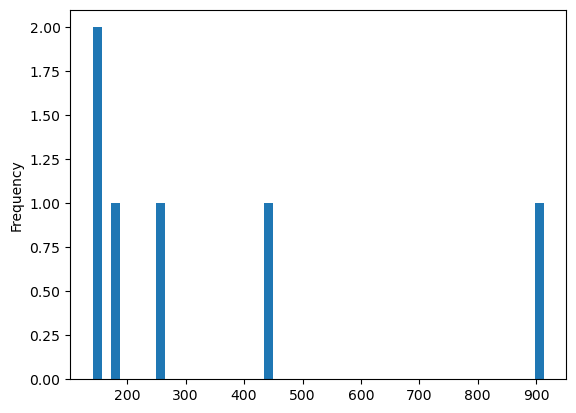

In [18]:
#unemployed labor force ranges from 0 people to 1000 people per census tract
df2['Unemployed'].plot.hist(bins=50)

<AxesSubplot: >

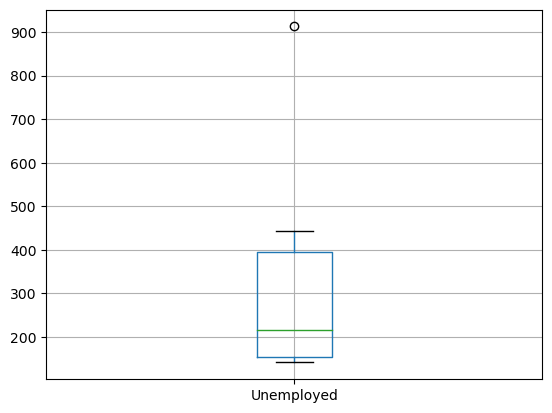

In [19]:
df2.boxplot(column=['Unemployed'])

<AxesSubplot: xlabel='Employed', ylabel='Unemployed'>

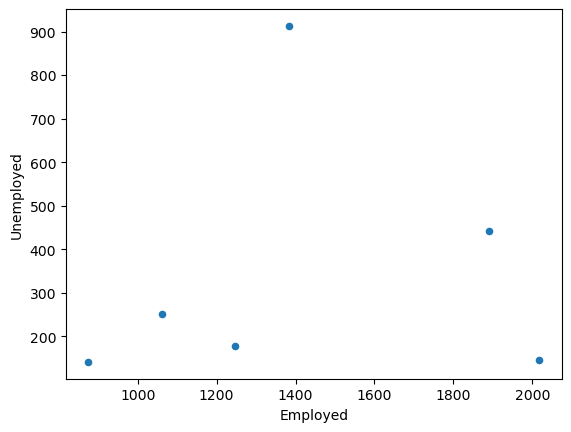

In [20]:
df2.plot.scatter(x='Employed',y='Unemployed')

In [21]:
#sorting top or highest employed census tracts 
df_sorted= df2.sort_values(by= 'Employed',ascending= False)

In [22]:
#display a few columns of the data 
df_sorted[['FIPS','Employed']].head(6)

,FIPS,Employed
3,42101028300,2018
1,42101028100,1891
2,42101028200,1383
0,42101028000,1246
4,42101028400,1062
5,42101028500,875


<AxesSubplot: xlabel='FIPS'>

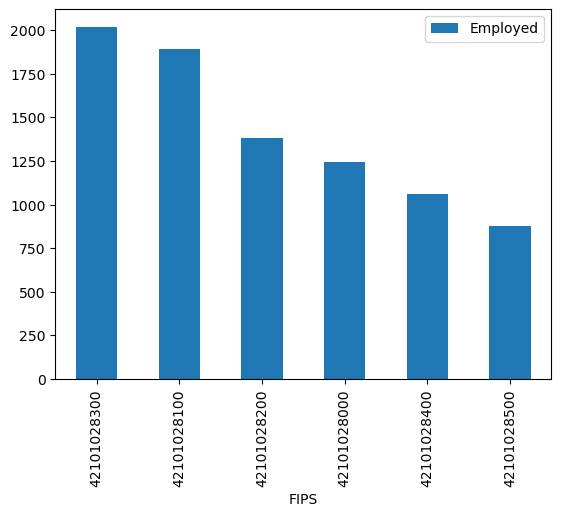

In [23]:
df_sorted.head(6).plot.bar(x='FIPS',y= 'Employed')

In [24]:
#same for unemployed 
df_sorted= df2.sort_values(by= 'Unemployed',ascending= False)

In [25]:
df_sorted[['FIPS','Unemployed']].head(6)

,FIPS,Unemployed
2,42101028200,913
1,42101028100,442
4,42101028400,251
0,42101028000,178
3,42101028300,146
5,42101028500,141


<AxesSubplot: xlabel='FIPS'>

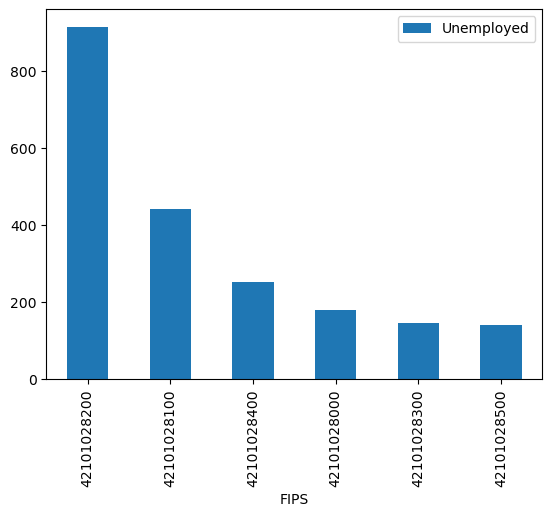

In [26]:
df_sorted.head(6).plot.bar(x='FIPS',y= 'Unemployed')

<AxesSubplot: title={'center': 'Number of Unemployed per Census Tract in Logan Area in 2021'}, xlabel='FIPS'>

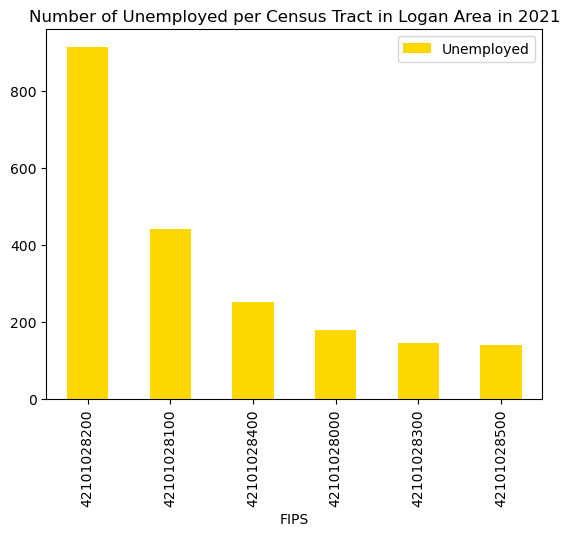

In [27]:
df_sorted.head(6).plot.bar(x='FIPS',
                             y= 'Unemployed',
                             title= 'Number of Unemployed per Census Tract in Logan Area in 2021',
                             color= 'gold')

## Map Creation

### Looking at Logan Area

In [28]:
import geopandas as gpd

In [29]:
tracts=gpd.read_file('data/Philly_Census_Tracts_2010.geojson')
tracts.head()

,OBJECTID,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,LOGRECNO,geometry
0,1,42,101,009400,42101009400,94,Census Tract 94,G5020,S,366717,0,+39.9632709,-075.2322437,10429,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,2,42,101,009500,42101009500,95,Census Tract 95,G5020,S,319070,0,+39.9658709,-075.2379140,10430,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,3,42,101,009600,42101009600,96,Census Tract 96,G5020,S,405273,0,+39.9655396,-075.2435075,10431,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,4,42,101,013800,42101013800,138,Census Tract 138,G5020,S,341256,0,+39.9764504,-075.1771771,10468,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,5,42,101,013900,42101013900,139,Census Tract 139,G5020,S,562934,0,+39.9750563,-075.1711846,10469,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


<AxesSubplot: >

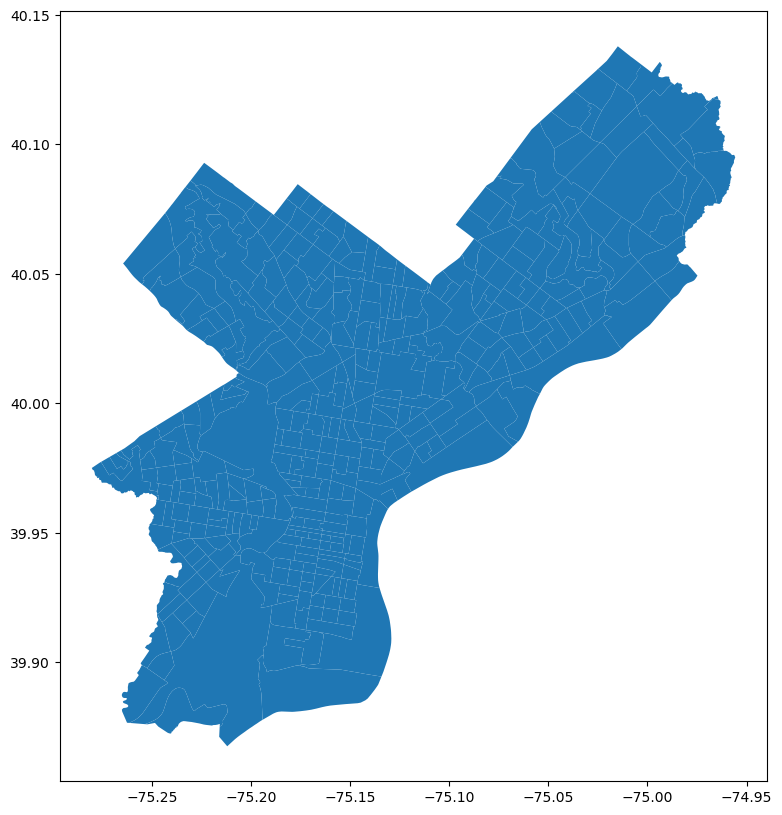

In [30]:
tracts.plot(figsize=(12,10)) #plot the census tracts 

In [31]:
#more about the data 
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    384 non-null    int64   
 1   STATEFP10   384 non-null    object  
 2   COUNTYFP10  384 non-null    object  
 3   TRACTCE10   384 non-null    object  
 4   GEOID10     384 non-null    object  
 5   NAME10      384 non-null    object  
 6   NAMELSAD10  384 non-null    object  
 7   MTFCC10     384 non-null    object  
 8   FUNCSTAT10  384 non-null    object  
 9   ALAND10     384 non-null    int64   
 10  AWATER10    384 non-null    int64   
 11  INTPTLAT10  384 non-null    object  
 12  INTPTLON10  384 non-null    object  
 13  LOGRECNO    384 non-null    object  
 14  geometry    384 non-null    geometry
dtypes: geometry(1), int64(3), object(11)
memory usage: 45.1+ KB


In [32]:
#subset the data for FIPS and geometry 
tracts=tracts[['GEOID10','geometry']]

In [33]:
tracts.head() #check the data

,GEOID10,geometry
0,42101009400,"POLYGON ((-75.22927 39.96054, -75.22865 39.960..."
1,42101009500,"POLYGON ((-75.23536 39.96852, -75.23545 39.969..."
2,42101009600,"POLYGON ((-75.24343 39.96230, -75.24339 39.962..."
3,42101013800,"POLYGON ((-75.17341 39.97779, -75.17386 39.977..."
4,42101013900,"POLYGON ((-75.17313 39.97776, -75.17321 39.977..."


In [34]:
columns=list(tracts)
columns

['GEOID10', 'geometry']

In [35]:
tracts.columns=['FIPS',     
                'geometry']  #changing column names 

In [36]:
tracts.sample(5)  #took sample of 5 data rows 

,FIPS,geometry
339,42101038500,"POLYGON ((-75.20733 40.07657, -75.20744 40.076..."
29,42101020600,"POLYGON ((-75.18196 40.02554, -75.18251 40.025..."
381,42101039000,"POLYGON ((-75.08824 40.04034, -75.08820 40.040..."
316,42101007102,"POLYGON ((-75.22343 39.94118, -75.22324 39.941..."
193,42101000600,"POLYGON ((-75.16394 39.95087, -75.16401 39.950..."


In [37]:
#create a new dataframe based on join to merge employment and tract data to create a map 
tracts_labor=tracts.merge(df2,on="FIPS")

In [38]:
tracts_labor.head(6)  #show data details 

,FIPS,geometry,Total Labor,Employed,Unemployed,Pct Employed,Pct Unemployed
0,42101028300,"POLYGON ((-75.14169 40.02076, -75.14159 40.020...",2164,2018,146,93.25,6.75
1,42101028400,"POLYGON ((-75.13571 40.02392, -75.13555 40.026...",1313,1062,251,80.88,19.12
2,42101028500,"POLYGON ((-75.13527 40.02919, -75.13541 40.027...",1016,875,141,86.12,13.88
3,42101028000,"POLYGON ((-75.15385 40.02217, -75.15336 40.022...",1424,1246,178,87.50,12.50
4,42101028100,"POLYGON ((-75.14658 40.03065, -75.14652 40.030...",2333,1891,442,81.05,18.95
5,42101028200,"POLYGON ((-75.13507 40.03129, -75.13497 40.032...",2296,1383,913,60.24,39.76


<AxesSubplot: >

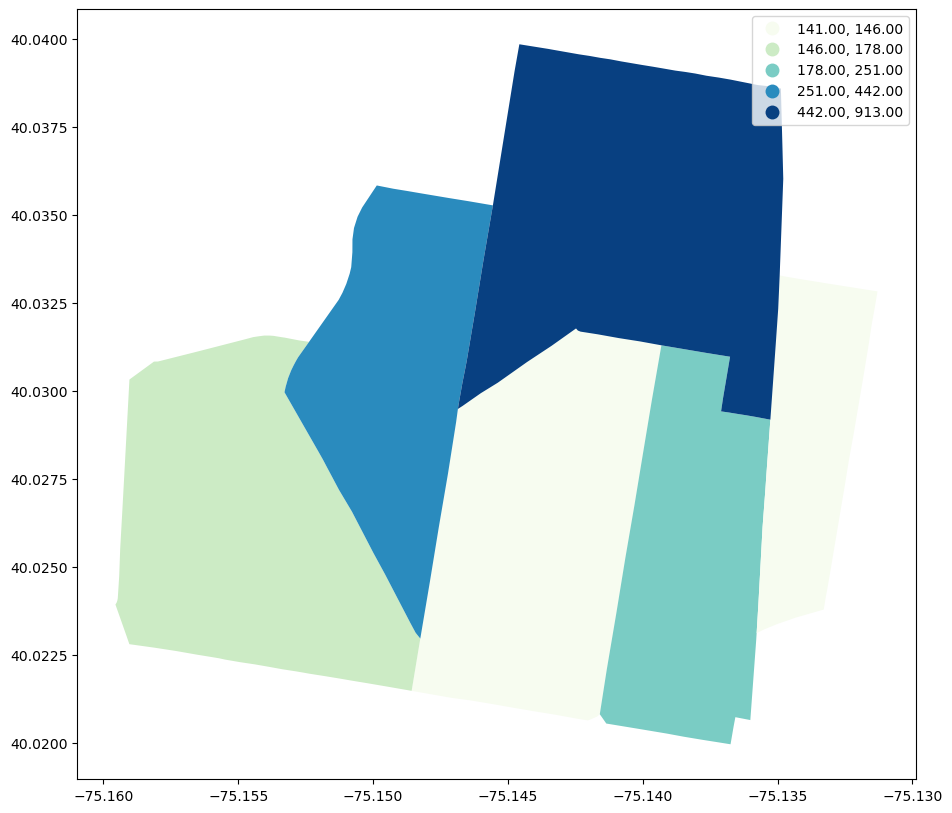

In [43]:
#simple plot creation with newly joined data 
tracts_labor.plot(figsize=(12,10),
                  column='Unemployed',
                  legend=True,
                  cmap= 'GnBu',
                  scheme='NaturalBreaks')

<AxesSubplot: >

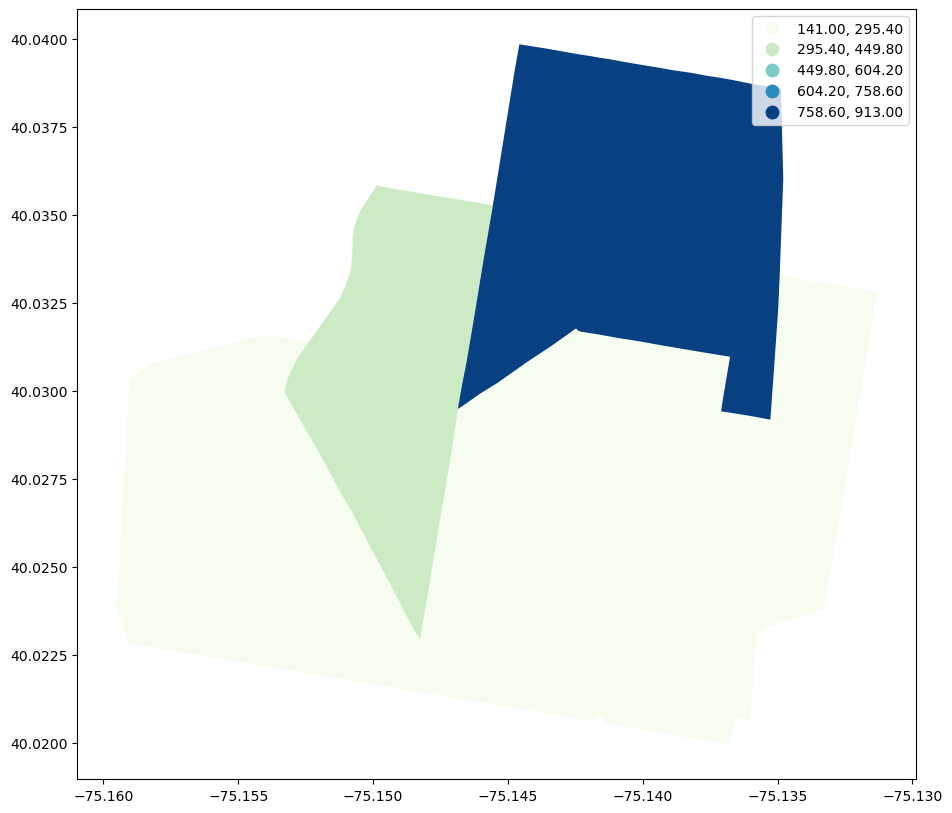

In [44]:
tracts_labor.plot(figsize=(12,10),
                 column='Unemployed',
                 legend=True, 
                 cmap= 'GnBu', 
                 scheme='equal_interval')

<AxesSubplot: >

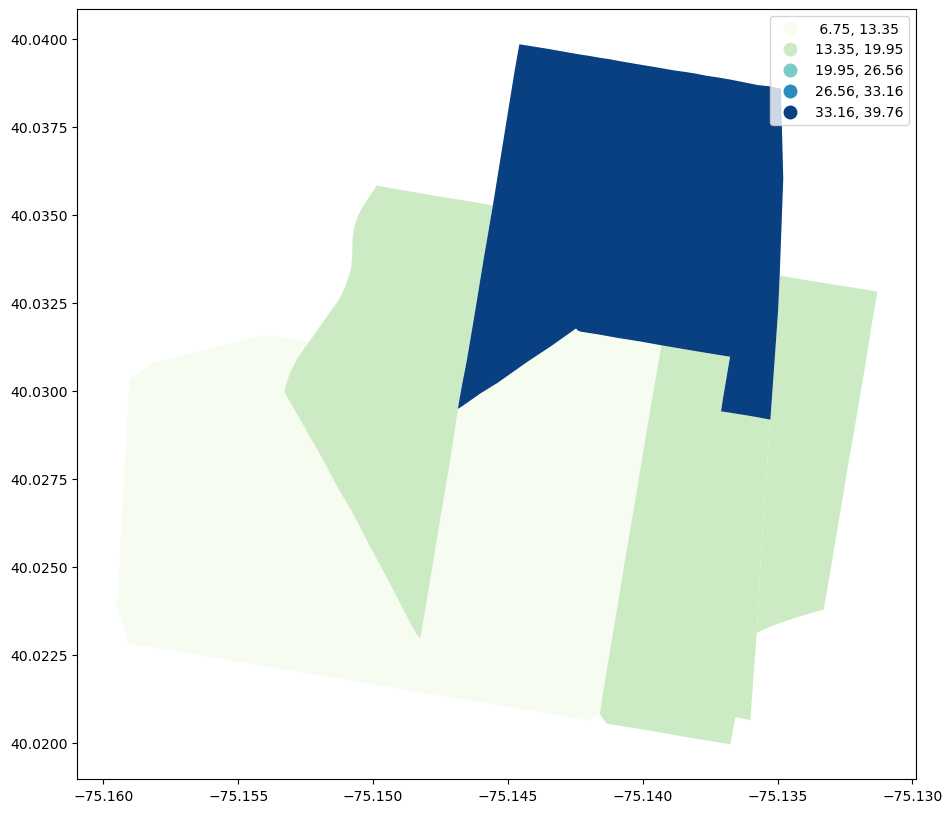

In [45]:
tracts_labor.plot(figsize=(12,10),
                 column='Pct Unemployed',
                 legend=True, 
                  cmap= 'GnBu',
                 scheme='equal_interval')

#### Group Members: Deja McCauley, Olivia Arena, Lindsey Morris, Cassie Truong
#### My role for this project includes data analysis and visualization for Philadelphia and Logan Unemployment and Food Retail data